In [1]:
%load_ext watermark
%watermark -a "Teresiah Kahura" -d -t -v -p numpy,pandas,matplotlib -g

Teresiah Kahura 2020-08-05 07:26:45 

CPython 3.7.3
IPython 7.16.1

numpy 1.18.5
pandas 0.24.2
matplotlib 3.0.3
Git hash: HEAD


In [2]:
from __future__ import print_function
%matplotlib inline

import os

import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.preprocessing import sequence

import re
import string

PROJ_ROOT = os.path.join(os.pardir, os.pardir)

In [3]:
def load_data(reviews_path):
    
    df1 = pd.read_csv(reviews_path)
    
    
    return df1

reviews_path = os.path.join(PROJ_ROOT, "data", "raw", "book_reviews.csv")
    
df1 = load_data(reviews_path)   

assert df1.shape == (2808, 2)

In [4]:
df1.head()

,text,label
0,Fascinating view into the past: This book is f...,__label__2
1,A very amusing look at the past: I was hoping ...,__label__2
2,Didn't like...: I didn't like this version of ...,__label__1
3,"Two Divas,that should shut up!: Here are two s...",__label__1
4,Movie Version is Much better!: The movie versi...,__label__1


In [5]:
df1.tail()

,text,label
2803,If it was not for Diane Lane....: If it was no...,__label__1
2804,Tuscany steals the show: This title was on my ...,__label__1
2805,"Diane Lane feast...: Man, hardly have I watche...",__label__1
2806,Ho-Hum: One of the biggest disappointments I h...,__label__1
2807,barely cosi cosi (so so): This might be an ok ...,__label__1


In [6]:
df1 = df1.replace('__label__1', 0)
df1= df1.replace('__label__2', 1)
df1.head()

,text,label
0,Fascinating view into the past: This book is f...,1
1,A very amusing look at the past: I was hoping ...,1
2,Didn't like...: I didn't like this version of ...,0
3,"Two Divas,that should shut up!: Here are two s...",0
4,Movie Version is Much better!: The movie versi...,0


In [7]:
df1.tail()

,text,label
2803,If it was not for Diane Lane....: If it was no...,0
2804,Tuscany steals the show: This title was on my ...,0
2805,"Diane Lane feast...: Man, hardly have I watche...",0
2806,Ho-Hum: One of the biggest disappointments I h...,0
2807,barely cosi cosi (so so): This might be an ok ...,0


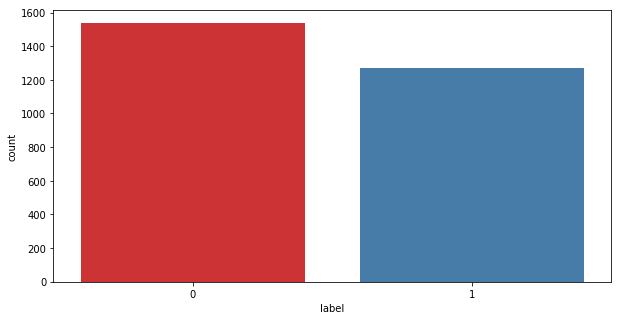

In [8]:
plt.figure(figsize = (10, 5))
chart = sns.countplot(df1['label'], 
                      palette="Set1"
                     )


In [9]:
def load_data(reviews_path):
    
    df2 = pd.read_csv(reviews_path)
    
    
    return df2

reviews_path = os.path.join(PROJ_ROOT, "data", "raw", "review.csv")
    
df2 = load_data(reviews_path) 

assert df2.shape == (460, 14)

In [10]:
df2.columns

Index(['review_id', 'user_id', 'book_id', 'author_id', 'review_text', 'review_rating', 'review_votes', 'spoiler_flag', 'spoiler_state', 'review_added_date', 'review_updated_date', 'review_read_count', 'comments_count', 'review_url'], dtype='object')

In [11]:
df2.head()

,review_id,user_id,book_id,author_id,review_text,review_rating,review_votes,spoiler_flag,spoiler_state,review_added_date,review_updated_date,review_read_count,comments_count,review_url
0,3200590976,62648565,51228520,18600770,Mihile was born blind and lives in an undergro...,5,0,False,none,Fri Feb 21 09:43:52 -0800 2020,Fri Feb 21 09:44:01 -0800 2020,1,0,https://www.goodreads.com/review/show/3200590976
1,3200590529,69848315,51509350,16141984,"A fast insta-everything romance readLucy, a ma...",4,0,False,none,Fri Feb 21 09:43:26 -0800 2020,Fri Feb 21 09:50:59 -0800 2020,1,0,https://www.goodreads.com/review/show/3200590529
2,3200590444,25556548,8366074,3472,"I love everything Margaret Atwood writes, not ...",5,0,False,none,Fri Feb 21 09:43:21 -0800 2020,Fri Feb 21 09:44:01 -0800 2020,1,0,https://www.goodreads.com/review/show/3200590444
3,3200590370,108595664,9255439,4242779,the best,5,0,False,none,Fri Feb 21 09:43:17 -0800 2020,Fri Feb 21 09:43:38 -0800 2020,1,0,https://www.goodreads.com/review/show/3200590370
4,3200589330,42360263,7927946,52349,"É inegável, sobretudo por conta do tempo e da ...",5,0,False,none,Fri Feb 21 09:42:21 -0800 2020,Fri Feb 21 09:42:59 -0800 2020,1,0,https://www.goodreads.com/review/show/3200589330


In [12]:
df2 = df2[['review_text', 'review_rating']]
df2.head()

,review_text,review_rating
0,Mihile was born blind and lives in an undergro...,5
1,"A fast insta-everything romance readLucy, a ma...",4
2,"I love everything Margaret Atwood writes, not ...",5
3,the best,5
4,"É inegável, sobretudo por conta do tempo e da ...",5


In [13]:
df2['review_rating'].value_counts()

5    211
4    131
3     58
0     26
2     20
1     14
Name: review_rating, dtype: int64

In [14]:
df2['label'] = np.where(df2['review_rating'] < 4, 0, 1)
df2.head()


,review_text,review_rating,label
0,Mihile was born blind and lives in an undergro...,5,1
1,"A fast insta-everything romance readLucy, a ma...",4,1
2,"I love everything Margaret Atwood writes, not ...",5,1
3,the best,5,1
4,"É inegável, sobretudo por conta do tempo e da ...",5,1


In [15]:
df2 = df2[['review_text', 'label']]

In [16]:

df2.head()

,review_text,label
0,Mihile was born blind and lives in an undergro...,1
1,"A fast insta-everything romance readLucy, a ma...",1
2,"I love everything Margaret Atwood writes, not ...",1
3,the best,1
4,"É inegável, sobretudo por conta do tempo e da ...",1


In [17]:
df2['text'] = df2['review_text']
df2.head()

,review_text,label,text
0,Mihile was born blind and lives in an undergro...,1,Mihile was born blind and lives in an undergro...
1,"A fast insta-everything romance readLucy, a ma...",1,"A fast insta-everything romance readLucy, a ma..."
2,"I love everything Margaret Atwood writes, not ...",1,"I love everything Margaret Atwood writes, not ..."
3,the best,1,the best
4,"É inegável, sobretudo por conta do tempo e da ...",1,"É inegável, sobretudo por conta do tempo e da ..."


In [18]:
df2 = df2 [['text', 'label']]
df2.head()

,text,label
0,Mihile was born blind and lives in an undergro...,1
1,"A fast insta-everything romance readLucy, a ma...",1
2,"I love everything Margaret Atwood writes, not ...",1
3,the best,1
4,"É inegável, sobretudo por conta do tempo e da ...",1


(array([0, 1]), <a list of 2 Text xticklabel objects>)

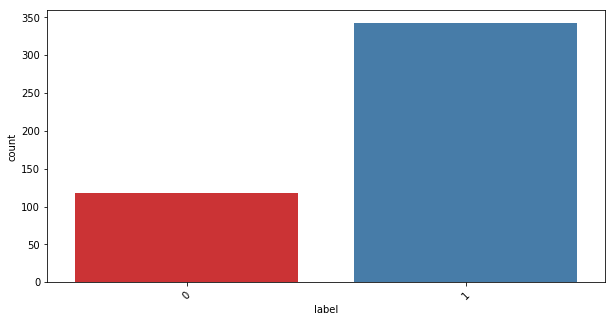

In [19]:
plt.figure(figsize = (10, 5))
chart = sns.countplot(df2['label'], 
                      palette="Set1"
                     )
plt.xticks(rotation = 45)

In [20]:
frames = [df1, df2]
df = pd.concat(frames)
df.shape

(3268, 2)

In [21]:
df.head()

,text,label
0,Fascinating view into the past: This book is f...,1
1,A very amusing look at the past: I was hoping ...,1
2,Didn't like...: I didn't like this version of ...,0
3,"Two Divas,that should shut up!: Here are two s...",0
4,Movie Version is Much better!: The movie versi...,0


In [22]:
df.tail()

,text,label
455,"A second chance story full of suspense, traged...",1
456,A lovely wordless picture book with endearing ...,1
457,I’m glad a gay writer won the Pulitzer for wri...,0
458,good world and interesting story but the chara...,0
459,"Sex, pairs of hands and love times 10Laura is ...",1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3268 entries, 0 to 459
Data columns (total 2 columns):
text     3268 non-null object
label    3268 non-null int64
dtypes: int64(1), object(1)
memory usage: 76.6+ KB


In [24]:
df.to_pickle("./reviews2.pkl")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

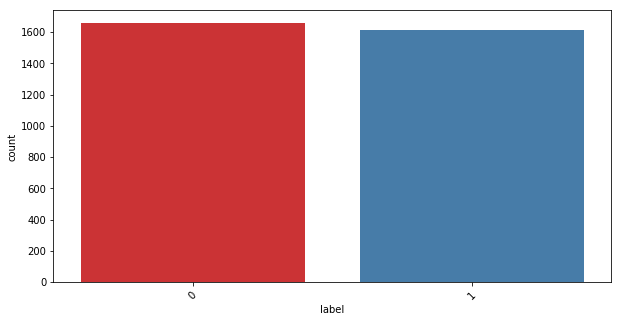

In [25]:
unpickled_df = pd.read_pickle("./reviews2.pkl")
plt.figure(figsize = (10, 5))
chart = sns.countplot(unpickled_df['label'], 
                      palette="Set1"
                     )
plt.xticks(rotation = 45)

In [26]:
unpickled_df['label'].value_counts()

0    1656
1    1612
Name: label, dtype: int64

# Bag of Words and Bernoulli Naive Bayes

In [27]:
from sklearn.feature_extraction.text import CountVectorizer


def make_features(unpickled_df, vectorizer=None):  
    if vectorizer is None:
        vectorizer = CountVectorizer(stop_words = 'english', max_df=0.5, ngram_range=(1, 3))
    X = vectorizer.fit_transform(unpickled_df.text)
    y = unpickled_df['label']
    return X, y

X, y = make_features(unpickled_df)
  

In [28]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

clf = BernoulliNB()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.7849133537206932

In [29]:
clf.feature_count_.shape

(2, 205713)

In [ ]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '\d<[^>]+@#>', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [ ]:
train, validate, test = np.split(unpickled_df.sample(frac=1), [int(0.8 * len(unpickled_df)), int(0.9 * len(unpickled_df))])
print(unpickled_df.shape)
print(train.shape)
print(validate.shape)
print(test.shape)

In [ ]:
max_features = 5000
embedding_dims = 2
sequence_length = 500

vectorize_layer = TextVectorization(
    max_tokens = max_features, 
    output_mode = 'int',
    output_sequence_length = sequence_length,
    standardize = custom_standardization 
)


In [ ]:
text_ds = train['text'].values
text_ds

In [ ]:
vectorize_layer.adapt(text_ds)

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label


In [ ]:
train_ds = vectorize_text(train['text'].values, train['label'])
val_ds = vectorize_text(validate['text'].values, validate['label'])
test_ds = vectorize_text(test['text'].values, test['label'])

In [ ]:
train_ds[0]

In [ ]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dims),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

In [ ]:
model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer='adam', 
    metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds
    )